# Introduction to Importing Data in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

# Import the course datasets
titanic = pd.read_csv("datasets/titanic_sub.csv")
battledeath_2002 = pd.ExcelFile("datasets/battledeath.xlsx").parse("2002")
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
con = engine.connect()
rs = con.execute('SELECT * FROM Album')
chinook = pd.DataFrame(rs.fetchall())
seaslug = np.loadtxt("datasets/seaslug.txt", delimiter="\t", dtype=str)

## Explore Datasets
Try importing the remaining files to explore the data and practice your skills!
- `datasets/disarea.dta`
- `datasets/ja_data2.mat`
- `datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5`
- `datasets/mnist_kaggle_some_rows.csv`
- `datasets/sales.sas7bdat`

## Reading a text file

In [3]:
filename = "datasets/seaslug.txt"

#open function takes two arguments - file_name & mode
file = open(filename , mode ="r") #r is for read only
text = file.read()
print(file.closed) #check if the file is closed or not
file.close() #close the file
print(file.closed) #check if the file is closed or not

False
True


## Reading text with context manager "with"

In [4]:
#using context manager "with" no need to close the file
with open(filename,"r") as file:
    print(file.read())  

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133


## Importing different datatypes using NumPy

### 1. np.loadtxt()

- Complete the first call to np.loadtxt() by passing file as the first argument.
- Execute print(data[0]) to print the first element of data.
- Complete the second call to np.loadtxt(). The file you're importing is tab-delimited, the datatype is float, and you want to skip the first row.
- Print the 10th element of data_float by completing the print() command. Be guided by the previous print() call.
- Execute the rest of the code to visualize the data.

['Time' 'Percent']
[0.    0.357]


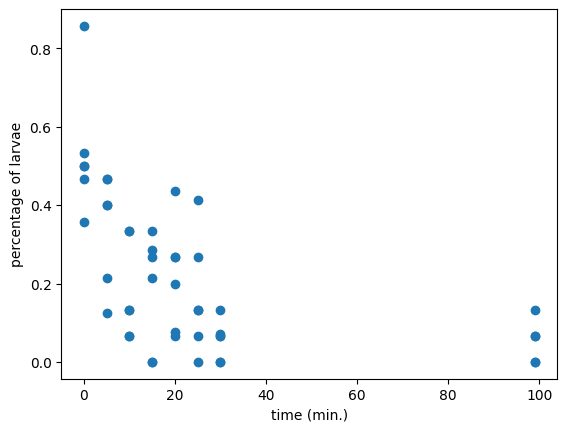

In [5]:
# Assign filename: file
file = 'datasets/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

### 2. np.genfromtxt()

Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. 

In [7]:
data = np.genfromtxt('datasets/titanic_sub.csv', delimiter=',', names=True, dtype=None)
print(data["Survived"])

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

### 3. np.recfromcsv()

- Import titanic.csv using the function np.recfromcsv() and assign it to the variable, d. You'll only need to pass file to it because it has the defaults delimiter=',' and names=True in addition to dtype=None!
- Run the remaining code to print the first three entries of the resulting array d.

In [12]:
file = "datasets/titanic_sub.csv"
d = np.recfromcsv(file,delimiter = ",",names=True,dtype=None)
print(d[0:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


## Import Pickle file

In [ ]:
import pickle
with open("abc.pkl","rb") as file:
    d = pickle.load(file)

## Import Excel Sheets

- Assign the spreadsheet filename (provided above) to the variable file.
- Pass the correct argument to pd.ExcelFile() to load the file using pandas, assigning the result to the variable xls.
- Print the sheetnames of the Excel spreadsheet by passing the necessary argument to the print() function.

In [3]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'datasets/battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


- Load the sheet '2004' into the DataFrame df1 using its name as a string.
- Print the head of df1 to the shell.
- Load the sheet 2002 into the DataFrame df2 using its index (0).
- Print the head of df2 to the shell.

In [4]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse("2004")

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


- Parse the first sheet by index. In doing so, skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed to skiprows and names all need to be of type list.
- Parse the second sheet by index. In doing so, parse only the first column with the usecols parameter, skip the first row and rename the column 'Country'. The argument passed to usecols also needs to be of type list.

In [5]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=1, names=["Country","AAM due to War (2002)"])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=1, names=["Country"])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## Importing SAS files

- Import the module SAS7BDAT from the library sas7bdat.
- In the context of the file 'sales.sas7bdat', load its contents to a DataFrame df_sas, using the method to_data_frame() on the object file.
- Print the head of the DataFrame df_sas.
- Execute your entire script to produce a histogram plot!

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


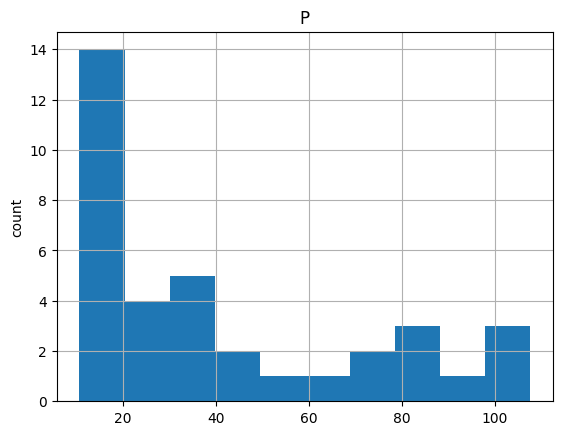

In [8]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

## Using read_stata to import Stata files

- Use pd.read_stata() to load the file 'disarea.dta' into the DataFrame df.
- Print the head of the DataFrame df.
- Visualize your results by plotting a histogram of the column disa10. We’ve already provided this code for you, so just run it!

  wbcode               country  disa1  disa2  ...  disa22  disa23  disa24  disa25
0    AFG           Afghanistan   0.00   0.00  ...    0.00    0.02    0.00    0.00
1    AGO                Angola   0.32   0.02  ...    0.99    0.98    0.61    0.00
2    ALB               Albania   0.00   0.00  ...    0.00    0.00    0.00    0.16
3    ARE  United Arab Emirates   0.00   0.00  ...    0.00    0.00    0.00    0.00
4    ARG             Argentina   0.00   0.24  ...    0.00    0.01    0.00    0.11

[5 rows x 27 columns]


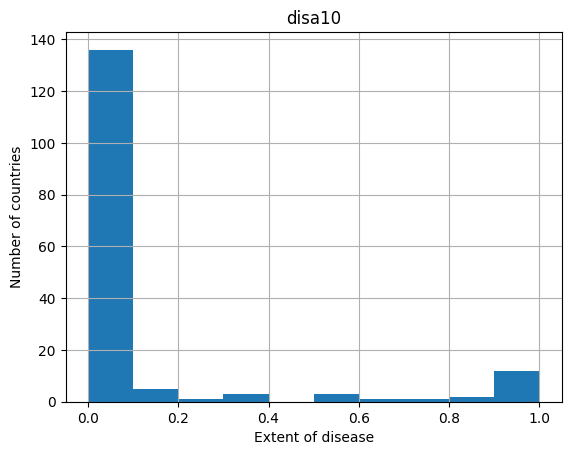

In [11]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata("datasets/disarea.dta")

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

## Using h5py to import HDF5 files

- Import the package h5py.
- Assign the name of the file to the variable file.
- Load the file as read only into the variable data.
- Print the datatype of data.
- Print the names of the groups in the HDF5 file 'LIGO_data.hdf5'.

In [12]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, "r")

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


<class 'h5py._hl.files.File'>
meta
quality
strain


- Assign the HDF5 group data['strain'] to group.
- In the for loop, print out the keys of the HDF5 group in group.
- Assign the time series data data['strain']['Strain'] to a NumPy array called strain.
- Set num_samples equal to 10000, the number of time points we wish to sample.
- Execute the rest of the code to produce a plot of the time series data in LIGO_data.hdf5.

Strain


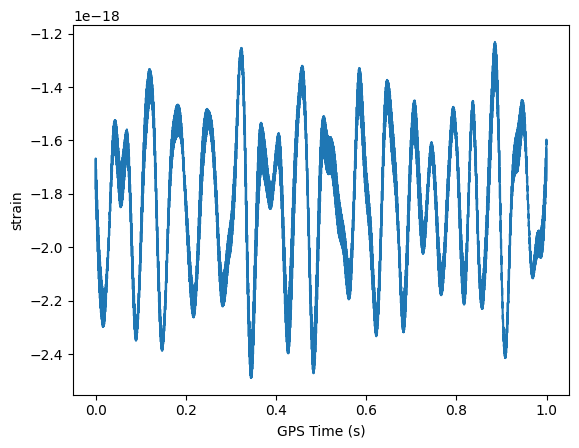

In [13]:
# Get the HDF5 group: group
group = data["strain"]

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

## Loading .mat files

- Import the package scipy.io.
- Load the file 'albeck_gene_expression.mat' into the variable mat; do so using the function scipy.io.loadmat().
- Use the function type() to print the datatype of mat to the IPython shell.

In [14]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('datasets/ja_data2.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


# Relational Database

## Creating a database engine

In [4]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///datasets/Chinook.sqlite')

- Import the function create_engine from the module sqlalchemy.
- Create an engine to connect to the SQLite database 'Chinook.sqlite' and assign it to engine.
- Using the method table_names() on the engine engine, assign the table names of 'Chinook.sqlite' to the variable table_names.
- Print the object table_names to the shell.

In [5]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine("sqlite:///datasets/Chinook.sqlite")

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


## Querying relational database in python

- Open the engine connection as con using the method connect() on the engine.
- Execute the query that selects ALL columns from the Album table. Store the results in rs.
- Store all of your query results in the DataFrame df by applying the fetchall() method to the results rs.
- Close the connection!

In [1]:
from sqlalchemy import create_engine
import pandas as pd

#create_engine
engine= create_engine("sqlite:///datasets/Chinook.sqlite")

#open connection with the engine as con
con = engine.connect()

#execute the query
rs = engine.execute("SELECT * FROM Album")

#store the query in the DataFrame
df = pd.DataFrame(rs.fetchall())

#set df column name
df.columns = rs.keys()

#close the connection
con.close()

#print df head
print(df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


## Querying relational database in Python with **context manager**

In [2]:
with engine.connect() as con:  #open connection with con
    rs = con.execute("SELECT LastName,Title from Employee") #execute query
    df = pd.DataFrame(rs.fetchmany(5))
print(df)

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent
3     Park  Sales Support Agent
4  Johnson  Sales Support Agent


## Filtering query using WHERE 

In [3]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("Select * from Employee where EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName  ...                Fax                    Email
0           6  Mitchell  ...  +1 (403) 246-9899  michael@chinookcorp.com
1           7      King  ...  +1 (403) 456-8485   robert@chinookcorp.com
2           8  Callahan  ...  +1 (403) 467-8772    laura@chinookcorp.com

[3 rows x 15 columns]


## Ordering query with ORDER BY

In [4]:
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("Select * from Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName  ...                Fax                     Email
0           4      Park  ...  +1 (403) 263-4289  margaret@chinookcorp.com
1           2   Edwards  ...  +1 (403) 262-3322     nancy@chinookcorp.com
2           1     Adams  ...  +1 (780) 428-3457    andrew@chinookcorp.com
3           5   Johnson  ...   1 (780) 836-9543     steve@chinookcorp.com
4           8  Callahan  ...  +1 (403) 467-8772     laura@chinookcorp.com

[5 rows x 15 columns]


## Querying relational databases directly with pandas

pd.read_sql_query("query_statement",engine) 

In [5]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("Select * from Album", engine)

# Print head of DataFrame
print(df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


## JOINing Tables

In [8]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///datasets/Chinook.sqlite")
engine.table_names() #getting table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [15]:
album = pd.read_sql_query("Select * from Album",engine)
artist = pd.read_sql_query("Select * from Artist", engine)
print(album.head())
print(artist.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains


In [13]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title,Name FROM Album INNER JOIN Artist on Album.ArtistID == Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


## Filtering your INNER JOIN

In [16]:
playlisttrack = pd.read_sql_query("Select * from PlaylistTrack",engine)
track = pd.read_sql_query("Select * from Track", engine)
print(playlisttrack.head())
print(track.head())

   PlaylistId  TrackId
0           1     3402
1           1     3389
2           1     3390
3           1     3391
4           1     3392
   TrackId                                     Name  ...     Bytes  UnitPrice
0        1  For Those About To Rock (We Salute You)  ...  11170334       0.99
1        2                        Balls to the Wall  ...   5510424       0.99
2        3                          Fast As a Shark  ...   3990994       0.99
3        4                        Restless and Wild  ...   4331779       0.99
4        5                     Princess of the Dawn  ...   6290521       0.99

[5 rows x 9 columns]


In [23]:
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId == Track.TrackId WHERE Milliseconds<250000",engine)
print(df.head())

   PlaylistId  TrackId  TrackId  ... Milliseconds    Bytes  UnitPrice
0           1     3390     3390  ...       217732  3559040       0.99
1           1     3392     3392  ...       230758  3766605       0.99
2           1     3393     3393  ...       218916  3577821       0.99
3           1     3394     3394  ...       228366  3728955       0.99
4           1     3395     3395  ...       213831  3497176       0.99

[5 rows x 11 columns]
